# Read and plot a SWOT-HR River Single Pass Reach product
*Authors: Lionel Zawadzki, CNES*

## Summary
In this notebook, we show how to read the SWOT-HR River Single Pass Reach vector product with geopandas and how to represent a variable 

### Libraries


In [1]:
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read a SWOT-HR River Single Pass Reach product
Note this is an extraction of the original file for demonstration purpose. It does not contain all variables and geometries

In [2]:
dir_swot = "../docs/data/swot"
file_swot_reach = os.path.join(
    dir_swot,
    "SWOT_L2_HR_RiverSP_Reach",
    "SWOT_L2_HR_RiverSP_Reach_015_033_SA_20240509T114031_20240509T114037_PIC0_01_extract.shp"
)
# read data with geopandas
gdf = gpd.read_file(file_swot_reach)
gdf.head()


,reach_id,time,time_tai,time_str,p_lat,p_lon,river_name,wse,wse_u,wse_r_u,...,p_wid_var,p_n_nodes,p_dist_out,p_length,p_maf,p_dam_id,p_n_ch_max,p_n_ch_mod,p_low_slp,geometry
0,61670400011,-1.000000e+12,-1.000000e+12,no_data,5.043291,-53.048925,no_data,-1.000000e+12,-1.000000e+12,-1.000000e+12,...,147791.751,3,89423.928,573.504801,-1.000000e+12,0,7,4,0,"LINESTRING (-53.05135 5.04175, -53.05108 5.041..."
1,61670400023,-1.000000e+12,-1.000000e+12,no_data,5.041275,-53.040153,no_data,-1.000000e+12,-1.000000e+12,-1.000000e+12,...,424227.915,9,91235.322,1811.393816,-1.000000e+12,0,10,2,0,"LINESTRING (-53.04677 5.04475, -53.04650 5.044..."
2,61670400033,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,4.993706,-53.027740,Le Sinnamary,2.958180e+01,7.493220e+00,7.492680e+00,...,2309349.443,50,88707.431,10027.236715,-1.000000e+12,0,22,4,0,"LINESTRING (-53.03375 5.03546, -53.03402 5.035..."
3,61670400043,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,4.921612,-53.016789,Le Sinnamary,3.064150e+01,1.184000e-01,7.693000e-02,...,4345107.297,39,96581.984,7874.552208,-1.000000e+12,0,33,8,0,"LINESTRING (-53.03404 4.95192, -53.03431 4.951..."
4,61670400053,-1.000000e+12,-1.000000e+12,no_data,4.955817,-53.042433,no_data,-1.000000e+12,-1.000000e+12,-1.000000e+12,...,482433.597,10,98607.588,2025.604217,-1.000000e+12,0,9,2,0,"LINESTRING (-53.05083 4.96087, -53.05056 4.960..."


Not a number values are loaded as floats, it is safer to replace them by actual NaN


In [3]:
fill_value = gdf.wse.min()
gdf.replace(fill_value, np.nan, inplace=True)
gdf.head()

,reach_id,time,time_tai,time_str,p_lat,p_lon,river_name,wse,wse_u,wse_r_u,...,p_wid_var,p_n_nodes,p_dist_out,p_length,p_maf,p_dam_id,p_n_ch_max,p_n_ch_mod,p_low_slp,geometry
0,61670400011,NaN,NaN,no_data,5.043291,-53.048925,no_data,NaN,NaN,NaN,...,147791.751,3,89423.928,573.504801,NaN,0,7,4,0,"LINESTRING (-53.05135 5.04175, -53.05108 5.041..."
1,61670400023,NaN,NaN,no_data,5.041275,-53.040153,no_data,NaN,NaN,NaN,...,424227.915,9,91235.322,1811.393816,NaN,0,10,2,0,"LINESTRING (-53.04677 5.04475, -53.04650 5.044..."
2,61670400033,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,4.993706,-53.027740,Le Sinnamary,29.5818,7.49322,7.49268,...,2309349.443,50,88707.431,10027.236715,NaN,0,22,4,0,"LINESTRING (-53.03375 5.03546, -53.03402 5.035..."
3,61670400043,7.685711e+08,7.685711e+08,2024-05-09T11:58:10Z,4.921612,-53.016789,Le Sinnamary,30.6415,0.11840,0.07693,...,4345107.297,39,96581.984,7874.552208,NaN,0,33,8,0,"LINESTRING (-53.03404 4.95192, -53.03431 4.951..."
4,61670400053,NaN,NaN,no_data,4.955817,-53.042433,no_data,NaN,NaN,NaN,...,482433.597,10,98607.588,2025.604217,NaN,0,9,2,0,"LINESTRING (-53.05083 4.96087, -53.05056 4.960..."


### 3. Plot data on maps
The most straightforward is to use native geopandas methods.
Check out geopandas documentation for more options: https://geopandas.org/en/v0.9.0/docs/user_guide/mapping.html

<Axes: >

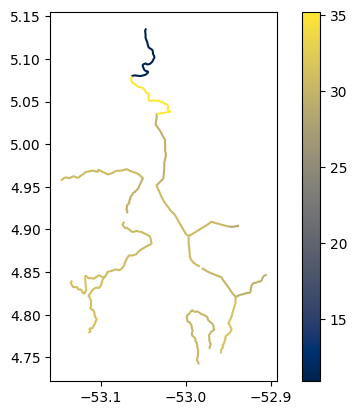

In [4]:
fig, ax = plt.subplots(1, 1)
gdf.plot('wse', ax=ax, legend=True, cmap='cividis')